# 🚀 EDA: Online Retail Dataset

## 3.1 Carga del Dataset

### 1. Importar bibliotecas necesarias

In [1]:
# 1. Importar bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

### 2. Carga del dataset

In [2]:
# 2. Carga del dataset
try:
    # Carga el archivo CSV en el DataFrame original (df_original)
    df_original = pd.read_csv('../data/online_retail_II.csv')
    print("Dataset 'online_retail_II.csv' cargado con éxito.")
except FileNotFoundError:
    # En caso de no encontrar el file, mostrar un mensaje de error
    print("ERROR: Asegúrate de que el archivo 'online_retail_II.csv' esté en la carpeta '../data/'.")
    df = None # Si hay error, df se establece a None

Dataset 'online_retail_II.csv' cargado con éxito.


In [3]:
# 3. Creamos una copia para realizar la limpieza, manteniendo el original para referencia
df = df_original.copy()

## 3.2 Exploración del Dataset Original

### 1. Revisar dimensiones y primeras filas

In [ ]:
# 1. Muestra dimensiones o el número de filas (registros) y columnas (variables)
print("\n--- Dimensiones del Dataset ---")
print(f"Filas: {df.shape[0]}, Columnas: {df.shape[1]}")


--- Dimensiones del Dataset ---
Filas: 1067371, Columnas: 8


In [10]:
# 4. Mostrar la lista completa de las columnas originales
print("\n--- Lista Completa de las Columnas Originales (Antes de la Limpieza) ---")

# El atributo .columns devuelve un Index con los nombres de las columnas.
# Usamos list() para presentarlo como una lista de Python más legible.
lista_columnas_originales = list(df.columns)
print(lista_columnas_originales)


--- Lista Completa de las Columnas Originales (Antes de la Limpieza) ---
['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'Price', 'Customer ID', 'Country']


In [8]:
# Primeras Filas (Sin truncar)
print("\nPrimeras 5 Filas del Dataset Original:")
df.head()


Primeras 5 Filas del Dataset Original:


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


### 2. Inspeccionar tipos de datos

In [11]:
# 1. Inspeccionar tipos de datos
print("\n--- Tipos de Datos ---")
df.info()


--- Tipos de Datos ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


##### **Nota mental de Inspeccion de tipos de datos:** 
**Informacion General:**
    Total filas:1,067,371
    Total colulmnas: 8

**Referente al conteo de No-Nulos**
1. **Columna Customer ID**: hay 242,977/1,067,371 valores faltantes o nulos (aproximadamente el 22.7%) en esta columna.
2. **Columna Description**: hay 4,382/1,067,371 valores faltantes o nulos.
3. Otras Columnas: no tienen valores faltantes o nulos

**Referente al tipo de dato**
1. **Columna InvoiceDate**: 
   - tiene datos tipo object (String) y deberian ser datetime64 (Formato fecha en castellano)
2. **Columna Price**: 
    - tiene datos tipo float64 y deberian ser float64; por lo que bien.
3. **Columna Customer ID**: 
    - tiene datos tipo float64 y deberian ser object o int64; por lo que debo decidir.
4. **Columna Quantity**: 
    - tiene datos tipo int64; por lo que bien.
5. **Columnas Invoice, StockCode, Description, Country**: 
    - tiene datos tipo object (String) y deberian ser object (Categórico o Texto); por lo que bien.

**Proximos pasos (pueden variar)**
1. Tratamiento de nulos: ver como gestionar los nulos en Customer ID y Description.
2. Corrección de tipos de datos: convertir datos de columna InvoiceDate a datetime64 y Customer ID a object; siempre y cuando haya tratado los nulos.



### 3. Estadísticas Descriptivas

In [24]:
# 3. Rango (analisis de rango y estadisticas de las variables numericas)
print("\n--- Estadísticas Descriptivas (Numéricas) ---")
print(df[['Quantity', 'Price']].describe().T) 
# NOTA: Los valores mínimos negativos en Quantity son devoluciones. 
# Los valores mínimos muy bajos (cercanos a 0 o 0) en Price también son una anomalía a tratar.


--- Estadísticas Descriptivas (Numéricas) ---
              count      mean         std       min   25%  50%    75%      max
Quantity  1067371.0  9.938898  172.705794 -80995.00  1.00  3.0  10.00  80995.0
Price     1067371.0  4.649388  123.553059 -53594.36  1.25  2.1   4.15  38970.0


##### **Nota mental Significado de las Metricas:** 

1. count:
- Número de valores no nulos en la columna.
- Me indica cuántos registros válidos tengo. Antes de la limpieza, se usa para detectar si faltan valores (si count es menor que el count de Invoice).
2. mean:
- El promedio de los valores de la columna.
- Quantity: La cantidad promedio de artículos por transacción.
3. std:
- Desviación Estándar: Mide qué tan dispersos están los datos del promedio.
- Un valor alto, especialmente en Quantity indica una gran variabilidad, con muchas transacciones atípicas (outliers).
4. min
- El valor más bajo encontrado en la columna.
- Quantity/Price: Es crucial. Si hay valores negativos; como es mi caso, se que tengo devoluciones o precios erróneos que debo limpiar.
5. 25% (Q1)
- El Primer Cuartil (Percentil 25). El 25% de los datos es menor o igual a este valor.
- Quantity/Price: El valor típico de una compra o precio bajo.
6. 50% (Q2)
- La Mediana (Percentil 50). El valor que divide el dataset en dos mitades.
- Es más robusto que el promedio ante la presencia de valores extremos uoutliers.
7. 75% (Q3)
- El Tercer Cuartil (Percentil 75). El 75% de los datos es menor o igual a este valor.
- Quantity/Price: El valor típico de una compra o precio alto.
8. max
- El valor más alto encontrado en la columna.
- me indica la transacción más grande o el precio más alto, un valor exageradamente alto también sugiere un outlier o valor atípico.

##### **Nota mental de Estadísticas Descriptivas:** 

**1. Uso el código df.describe() en esta fase para:**

1. Identificación de Datos Sucios:

    a. Valores Negativos: al ver valores negativos en min de Quantity y min de Price, se que debo aplicar el paso de limpieza para eliminar   devoluciones y errores de precio.
        
    b. Outliers: Al comparar el valor max con los percentiles (75%), se puede identificar si existen valores extremos. 
        Por ejemplo, si max de Quantity es $80,000$ pero el $75\%$ es solo $24$, indica que tienes transacciones gigantescas que podrían distorsionar tu análisis de promedio.
            
2. Comprensión de la Distribución:
    Te ayuda a entender la escala de los datos. Por ejemplo, si el mean y la median (50%) son muy diferentes, sugiere una distribución sesgada (asimetría), a menudo causada por esos mismos outliers; que es nuestro caso.

3. Verificación Post-Limpieza:
    Después de la limpieza, al ejecutar .describe() en mi df_final, el min de Quantity y Price debe ser 1 o un valor positivo muy pequeño, confirmando que la limpieza de valores negativos fue exitosa.


##### **En resumen:**
- Este código es mi primer punto de control para entender la calidad y la forma de mis datos brutos, es una guia para mi toma de desiciones en la fase de Limpieza.

- Se aplica describe() porque va más allá de un simple rango (min/max), este Proporciona la media, la desviación estándar, y los cuartiles (25%, 50%, 75%).
- Detección de Outliers: Permite identificar anomalías inmediatamente:
    * Un valor mínimo negativo en **`Quantity`** indica **devoluciones o cancelaciones**. Esto es una incoherencia lógica en un análisis de ventas; por lo que se debe tratar.
    * Un valor mínimo de **`Price`** cercano o igual a cero, indica productos regalados o errores de registro.

### 4. Valores Nulos y su porcentaje

In [10]:
# 1. Valores Nulos (df.isnull().sum())
print("\n--- Conteo de Valores Nulos por Columna ---")
null_counts = df.isnull().sum()
null_percentages = (df.isnull().sum() / len(df)) * 100
null_info = pd.DataFrame({'Nulos': null_counts, 'Porcentaje': null_percentages.round(2)})
print(null_info[null_info['Nulos'] > 0].sort_values(by='Nulos', ascending=False))


--- Conteo de Valores Nulos por Columna ---
              Nulos  Porcentaje
Customer ID  243007       22.77
Description    4382        0.41


### 5. Valores Faltantes (NaN)

In [19]:
# Identificación de Valores Faltantes (NaN)
print("\n--- Conteo de Valores Faltantes (NaN) por Columna:--- ")
nan_counts = df.isnull().sum()
print(nan_counts)


--- Conteo de Valores Faltantes (NaN) por Columna:--- 
Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64


##### **Nota mental de Valores faltantes:** 

1. Columna con Mayor Impacto: Customer ID
- Valores Faltantes: 243,007 registros no tienen un identificador de cliente, esto representa casi un 22.77% del dataset.
- esta es la variable más crítica para cualquier análisis de clientes. 
- La mejor práctica es eliminarlas por completo, ya que no se pueden imputar de manera confiable. 
- Esta eliminación será el paso más grande en mi fase de Limpieza 
- Esto reducirá el tamaño de tu dataset en aproximadamente una cuarta parte

2. Columna con Impacto Menor: Description
- Valores Faltantes: 4,382 registros, solo representa el 0.41% del total.
- Dado que el porcentaje es muy pequeño, tengo dos opciones en la Limpieza:
    Eliminar estas 4,382 filas, ya que no me afectará significativamente el volumen de datos restante.
    Rellenar los valores con una cadena categórica como 'Unknown' o 'Sin Descripción', lo cual es útil si planeo analizar el StockCode de estas transacciones; por lo que prefiero eliminar.

### 6. Duplicados

In [22]:
# 2. Duplicados
# Identificamos el número total de filas duplicadas por columnas
n_duplicated_rows = df.duplicated().sum()
print(f"\n--- Filas Duplicadas ---")
print(f"Total de Filas Duplicadas (exactas): {n_duplicated_rows}")


--- Filas Duplicadas ---
Total de Filas Duplicadas (exactas): 34335


### 7. Rango de Fechas

In [25]:
# 4. Rango de Fechas (analisis de rango temporal)
# Convertimos temporalmente 'InvoiceDate' a datetime para la exploración
df['InvoiceDate_temp'] = pd.to_datetime(df['InvoiceDate'])
min_date = df['InvoiceDate_temp'].min()
max_date = df['InvoiceDate_temp'].max()

print(f"\n--- Rango de Fechas (InvoiceDate) ---")
print(f"Fecha Mínima: {min_date}")
print(f"Fecha Máxima: {max_date}")


--- Rango de Fechas (InvoiceDate) ---
Fecha Mínima: 2009-12-01 07:45:00
Fecha Máxima: 2011-12-09 12:50:00


##### **Nota mental de rango de fechas:** 
1. Se analizan las fechas para establecer el período total cubierto por el dataset.

### 5. Exploración de Incoherencias y Categorías

In [29]:
# 1. Exploración de Incoherencias y Categorías

# Incoherencias en 'Quantity' y 'Price' (valores <= 0) para determinar outliers
n_negative_quantity = df[df['Quantity'] <= 0].shape[0]
n_zero_price = df[df['Price'] <= 0].shape[0]

print(f"\n--- Incoherencias en Variables Numéricas ---")
print(f"Registros con Quantity <= 0: {n_negative_quantity}")
print(f"Registros con Price <= 0: {n_zero_price}")


--- Incoherencias en Variables Numéricas ---
Registros con Quantity <= 0: 22950
Registros con Price <= 0: 6207


##### **Nota mental de Exploración de Incoherencias y Categorías:** 
1. Incoherencias en columnas Quantity y Price (Identificación de Incoherencias y Outliers lógicos):
    - **Quantity <= 0**:
        - En ventas una cantidad negativa casi siempre es una devolución o una transacción cancelada. 
        - Una cantidad cero es un registro anormal (outliers)
     - **Price <= 0**:
        - Segun copi en ventas una cantidad negativa anomalía crítica (outliers)
        - Una cantidad cero es un Un precio cero indica un artículo regalado, de muestra, o un error de registro.

In [ ]:
# 2. Incoherencias en 'Country' (Categórica) para entender dominio geográfico - Top 10 Países
print("\n--- Top 10 Países (Country) ---")
print(df['Country'].value_counts().head(10))


--- Top 10 Países (Country) ---
Country
United Kingdom    981330
EIRE               17866
Germany            17624
France             14330
Netherlands         5140
Spain               3811
Switzerland         3189
Belgium             3123
Portugal            2620
Australia           1913
Name: count, dtype: int64


##### **Nota mental de Exploración de Incoherencias y Categorías:** 
2. Incoherencias en columnas Country y Description (Identificación de la Distribución inicial de columnas):
    - **Incoherencias en columna Country**:
        - Se usa value_counts().head(10) para obtener y entender el dominio geográfico del negocio de la variable categorica Country. 
        - Reino Unido domina los datos.

In [ ]:
# 3. Incoherencias en 'Description' para identificar necesidad de limpieza de texto
print("\n--- Ejemplos de Descripción (Description) ---")
print(df['Description'].value_counts().head(5))

# Eliminamos la columna temporal
df.drop(columns=['InvoiceDate_temp'], inplace=True)


--- Ejemplos de Descripción (Description) ---
Description
WHITE HANGING HEART T-LIGHT HOLDER    5918
REGENCY CAKESTAND 3 TIER              4412
JUMBO BAG RED RETROSPOT               3469
ASSORTED COLOUR BIRD ORNAMENT         2958
PARTY BUNTING                         2765
Name: count, dtype: int64


##### **Nota mental de Exploración de Incoherencias y Categorías:** 
3. **Incoherencias en columna Description**:
        - Se usa value_counts().head(5) para tener una idea del inventario principal, ademas de evaluar si hay problemas de texto para su posterior normalizacion.
3. Elimino columna temporal (InvoiceDate_temp) que cree para explorar, sin modificar la columna original InvoiceDate en la parte 4. rango de fechas.
4. Esto me da evidencia cuantitativa de los problemas (incoherencias) y la visión cualitativa de las distribuciones (categorías) para la posterior fase de limpieza..


## 3.3 Limpieza y normalización


### 1. guardar los cambios de limpieza

In [37]:
# Inicializamos un diccionario para guardar los cambios de limpieza
cambios_limpieza = {}
total_filas_original = df.shape[0]

### 2. Corrección de Tipos de Datos

In [38]:
# 1. Corrección de Tipos de Datos

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Customer ID'] = df['Customer ID'].astype('object') 
print("\n Tipos de datos corregidos: InvoiceDate (datetime), Customer ID (object).")


 Tipos de datos corregidos: InvoiceDate (datetime), Customer ID (object).


##### **JUSTIFICACIÓN:**
1. 'InvoiceDate' es una fecha y debe ser tipo datetime para el análisis temporal.
2. 'Customer ID' es un identificador y no debe ser tratado como número, se convierte a string.

### 3. Tratamiento de valores faltantes o Nulos

In [39]:
# 2. Tratamiento de Nulos
# Nulos en 'Customer ID'
df.dropna(subset=['Customer ID'], inplace=True)
print(f"Nulos en 'Customer ID' eliminados. Filas restantes: {len(df)}")

Nulos en 'Customer ID' eliminados. Filas restantes: 824364


##### **JUSTIFICACIÓN:**
1. Los registros sin Customer ID no permiten el análisis de cohortes o clientes, Ya que representan el ~25% de los datos, la eliminación es una opción válida para un EDA enfocado en el comportamiento del cliente, aunque para un análisis de ventas totales, se podrían mantener (pero para este EDA, eliminaremos para enfocarnos en clientes identificados).

In [40]:
# Nulos en 'Description'
df.dropna(subset=['Description'], inplace=True)
print(f"Nulos en 'Description' eliminados. Filas restantes: {len(df)}")

Nulos en 'Description' eliminados. Filas restantes: 824364


##### **JUSTIFICACIÓN:**
1. Los nulos en 'Description' son muy pocos (< 1%) y la información del producto es clave. Se eliminan.

### 4. Eliminación o Tratamiento de Duplicados

In [41]:
# 3. Eliminación de Duplicados

df.drop_duplicates(inplace=True)
print(f"Filas duplicadas eliminadas. Filas restantes: {len(df)}")

Filas duplicadas eliminadas. Filas restantes: 797885


##### **JUSTIFICACIÓN:**
1. Se eliminan las filas duplicadas exactas, ya que no aportan información.
2. Adicional y podrían sesgar el conteo de transacciones.

### 5. Tratamiento de Outliers e Incoherencias Lógicas

In [44]:
# Filtrado de Valores Anómalos (Devoluciones y Precios Cero)
# Se define df_final aquí, filtrando Cantidad (Quantity) y Precio (Price) positivos
filas_antes_filtro = df.shape[0]

df_final = df[
    (df['Quantity'] > 0) & 
    (df['Price'] > 0)
].copy() 

filas_eliminadas_filtro = filas_antes_filtro - df_final.shape[0]
cambios_limpieza['Filtro Anómalos'] = f"Se eliminaron {filas_eliminadas_filtro} filas con Quantity <= 0 o Price <= 0."
print(f"Outliers/Incoherencias (Quantity<=0 y Price<=0) eliminados. Filas restantes: {len(df)}")

Outliers/Incoherencias (Quantity<=0 y Price<=0) eliminados. Filas restantes: 797885


##### **JUSTIFICACIÓN:**

1. Elimino transacciones con 'Quantity' <= 0 (devoluciones y anulaciones), el objetivo es entender las ventas positivas.
2. Se eliminan las transacciones con 'Price' <= 0 (productos gratuitos o transacciones anómalas).

### 6. Creación de una Métrica Clave ('Sales')

In [49]:
# 1. creacion de columna calculada sales 
df_final['Sales'] = df_final['Quantity'] * df_final['Price']
print("cambios en limpieza, Columna 'Sales' (Quantity * Price) creada.")

cambios en limpieza, Columna 'Sales' (Quantity * Price) creada.


In [57]:
# 2. Revisar dimensiones y primeras filas después de la limpieza
if df is not None:
    # Muestra el número de filas (registros) y columnas (variables)
    print("\n--- Limpieza y Normalización Completada - Dimensiones del Dataset Después de la Limpieza ---")
    print(f"Filas: {df_final.shape[0]}, Columnas: {df_final.shape[1]}")


--- Limpieza y Normalización Completada - Dimensiones del Dataset Después de la Limpieza ---
Filas: 779425, Columnas: 9


### 7. Normalización de Categorías

In [69]:
# 1. mayúsculas y espacios en blanco eliminados
df_final['Country'] = df_final['Country'].str.upper().str.strip()
print("Columna 'Country' normalizada (mayúsculas y espacios en blanco eliminados).")

Columna 'Country' normalizada (mayúsculas y espacios en blanco eliminados).


##### **JUSTIFICACIÓN:**
1. Opcional, pero buena práctica.
2. Normalizar texto para evitar inconsistencias de mayúsculas/minúsculas.

In [ ]:
# 2. Revisión rápida del df_final
print("\nPrimeras 5 Filas de df_final (Limpiado y listo):")
df_final.head()


Primeras 5 Filas de df_final (Limpiado y listo):


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Sales
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,UNITED KINGDOM,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,UNITED KINGDOM,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,UNITED KINGDOM,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,UNITED KINGDOM,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,UNITED KINGDOM,30.0


##### **JUSTIFICACIÓN:**
1. El objetivo es crear una nueva columna, Sales (Ventas), que represente el valor real de cada transacción.
2. Las columnas Quantity (Cantidad de artículos) y Price (Precio unitario) por sí solas no indican el ingreso total de una línea de factura.
3. Cualquier pregunta de negocio sobre ingresos, rentabilidad, volumen de dinero o valor promedio de la orden necesita esta métrica.
4. Se realiza este cálculo después de haber limpiado las incoherencias y outliers lógicos para asegurar que el calculo sea preciso.
5. Al crear la columna Sales una vez que los datos son lógicamente correctos, se garantiza que la métrica refleje solo las ventas positivas y válidas.
6. Esta columna se convierte en la base para visualizaciones importantes.

## 3.4 Visualizaciones básicas (Usando df_final)

### 1. Histograma 


--- 1. Histograma: Distribución de las Ventas (Sales) ---


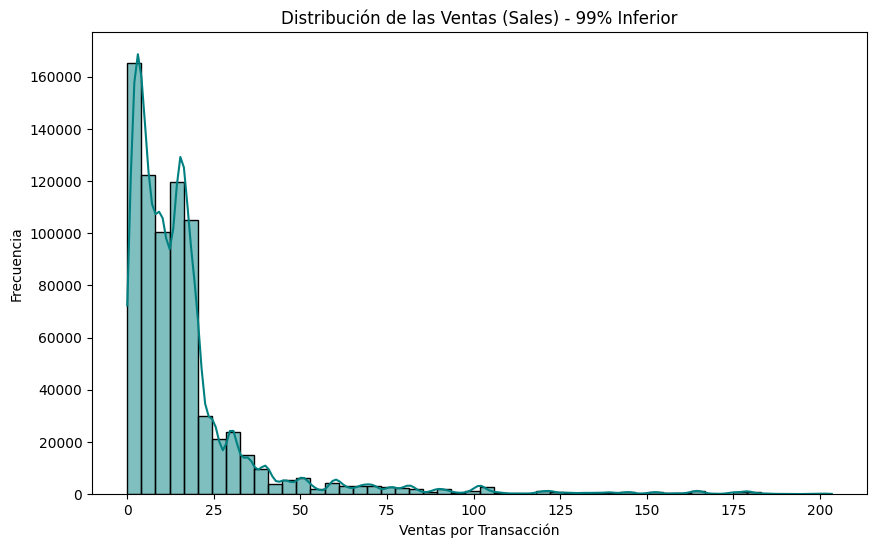

In [ ]:
# 1. Histograma de la Distribución de una variable numérica clave

# Se aplica un filtro para visualizar mejor la mayoría de los datos (eliminar el efecto de los outliers extremos).
print("\n--- 1. Histograma: Distribución de las Ventas (Sales) ---")

# Filtramos los valores extremos para hacer el histograma legible
sales_filtered = df[df['Sales'] < df['Sales'].quantile(0.99)] # Filtra el 1% superior
plt.figure(figsize=(10, 6))
sns.histplot(sales_filtered['Sales'], bins=50, kde=True, color='teal')
plt.title('Distribución de las Ventas (Sales) - 99% Inferior')
plt.xlabel('Ventas por Transacción')
plt.ylabel('Frecuencia')
plt.show()

##### **JUSTIFICACIÓN:**
1. Mostrar la distribución de la nueva columna 'Sales'.

### 2. Gráfica de Barras 


--- 2. Gráfica de Barras: Top 10 Países por Transacciones ---


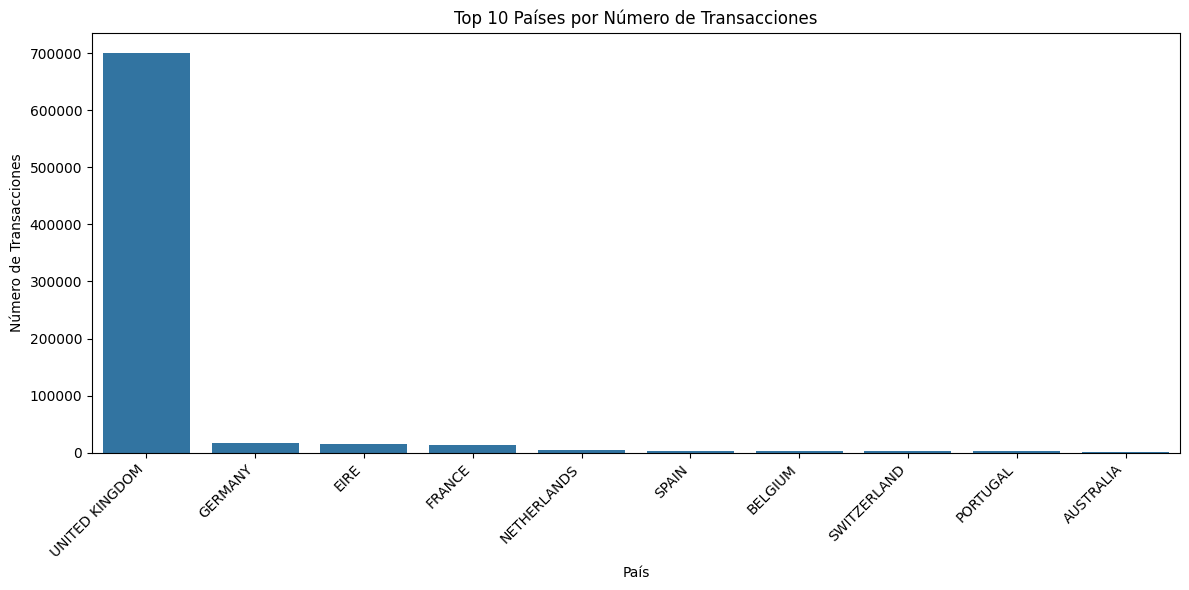

In [ ]:
# 2. Gráfica de Barras de Categorías más frecuentes

print("\n--- 2. Gráfica de Barras: Top 10 Países por Transacciones ---")
top_countries = df['Country'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.index, y=top_countries.values,)
plt.title('Top 10 Países por Número de Transacciones')
plt.xlabel('País')
plt.ylabel('Número de Transacciones')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### **JUSTIFICACIÓN:**
1. Identificar los principales 10 países por número de transacciones.


--- 3. Gráfica de Barras: Top 10 Países por Ventas Totales ---


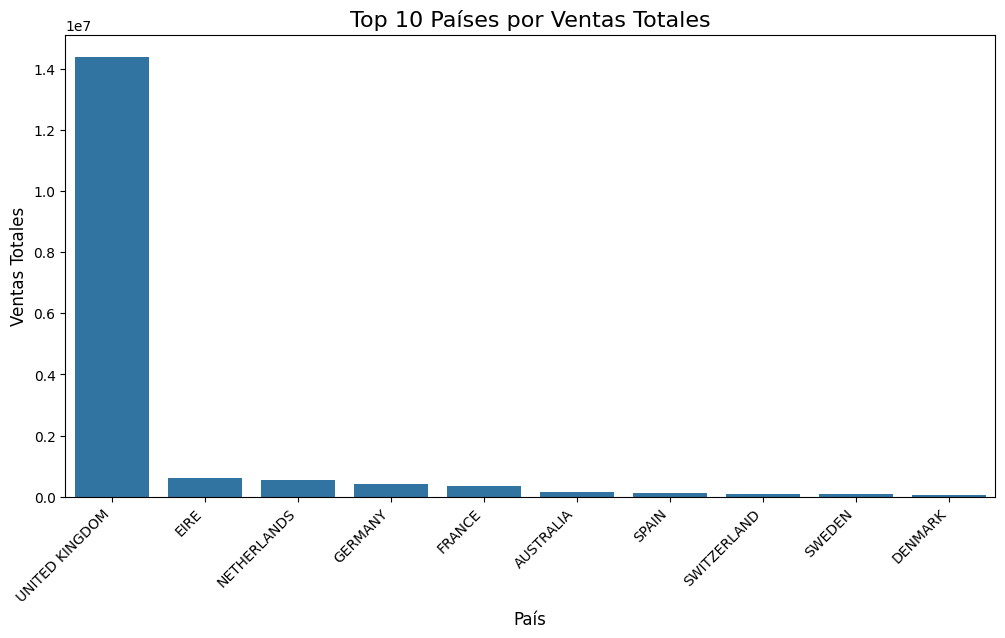

In [74]:
# --- Visualización 1: Top 10 Países por Ventas ---
country_sales = df_final.groupby('Country')['Sales'].sum().sort_values(ascending=False).head(10)
print("\n--- 3. Gráfica de Barras: Top 10 Países por Ventas Totales ---")
plt.figure(figsize=(12, 6))
sns.barplot(x=country_sales.index, y=country_sales.values, )
plt.title('Top 10 Países por Ventas Totales', fontsize=16)
plt.xlabel('País', fontsize=12)
plt.ylabel('Ventas Totales', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()


--- 4. Gráfica de Barras: Distribución de la Cantidad de Artículos por Transacción ---


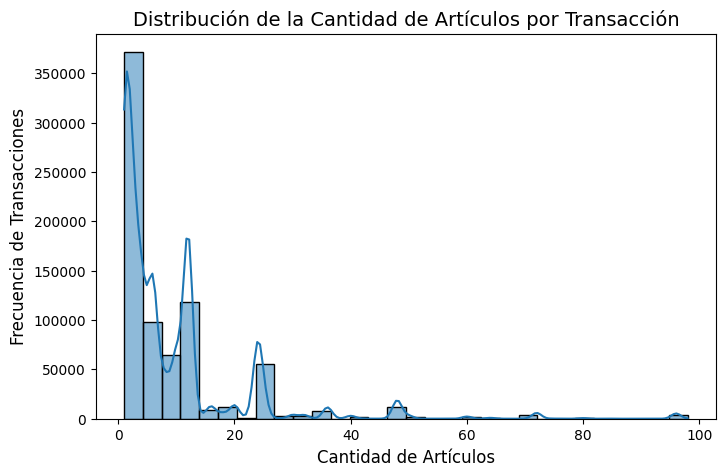

In [82]:
# --- Visualización 2: Distribución de la Cantidad de Artículos (Quantity) ---
# Limitamos a cantidades razonables para mejor visualización (e.g., Quantity < 100)
plt.figure(figsize=(8, 5))
print("\n--- 4. Gráfica de Barras: Distribución de la Cantidad de Artículos por Transacción ---")
sns.histplot(df_final[df_final['Quantity'] < 100]['Quantity'], bins=30, kde=True, )
plt.title('Distribución de la Cantidad de Artículos por Transacción', fontsize=14)
plt.xlabel('Cantidad de Artículos', fontsize=12)
plt.ylabel('Frecuencia de Transacciones', fontsize=12)
plt.show()

### 3. Visualización Adicional 


--- 5. Visualización Adicional: Tendencia Mensual de las Ventas ---


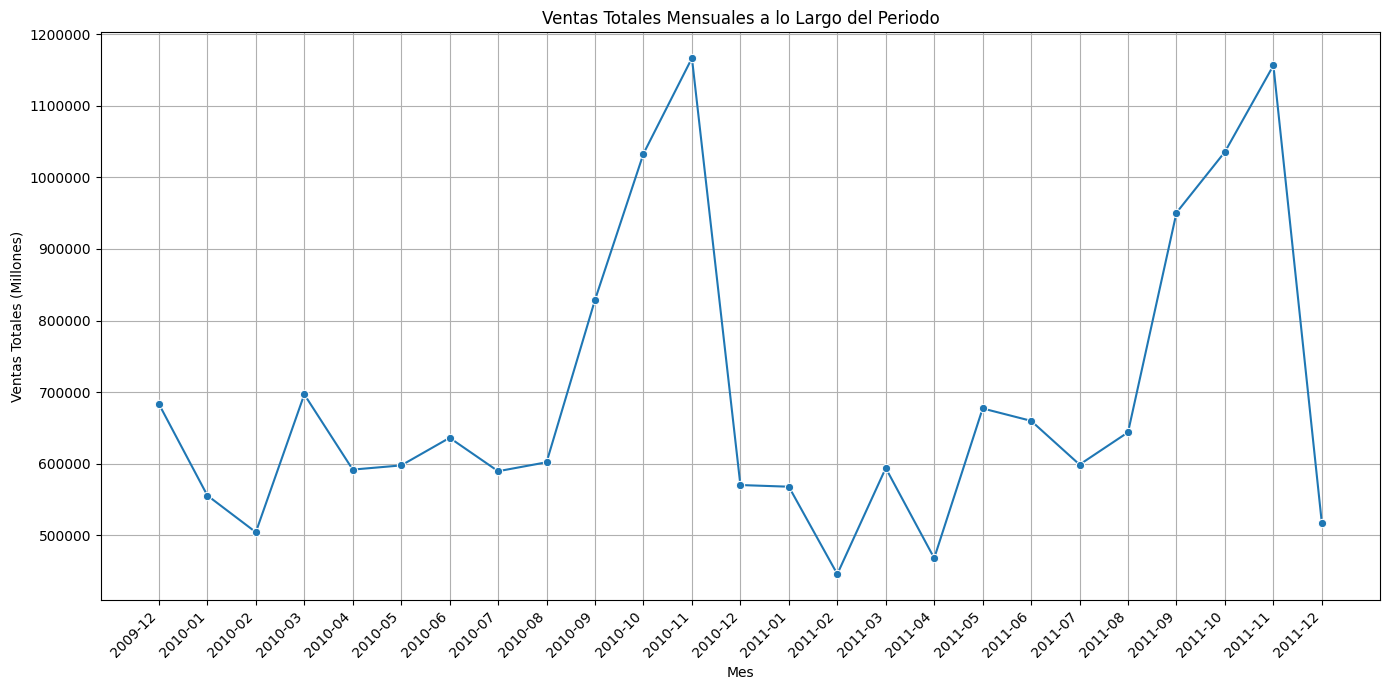

In [84]:
# Análisis Temporal/Tendencia de las ventas a lo largo del tiempo

# Agrupamos las ventas totales por mes.
print("\n--- 5. Visualización Adicional: Tendencia Mensual de las Ventas ---")
df_final['InvoiceMonth'] = df_final['InvoiceDate'].dt.to_period('M')
monthly_sales = df_final.groupby('InvoiceMonth')['Sales'].sum().to_frame().reset_index()

# Convertir el PeriodIndex a string para la visualización
monthly_sales['InvoiceMonth'] = monthly_sales['InvoiceMonth'].astype(str)

plt.figure(figsize=(14, 7))
sns.lineplot(x='InvoiceMonth', y='Sales', data=monthly_sales, marker='o', )
plt.title('Ventas Totales Mensuales a lo Largo del Periodo')
plt.xlabel('Mes')
plt.ylabel('Ventas Totales (Millones)')
plt.xticks(rotation=45, ha='right')
plt.ticklabel_format(style='plain', axis='y') # Evita la notación científica en el eje Y
plt.grid(True)
plt.tight_layout()
plt.show()

df_final.drop(columns=['InvoiceMonth'], inplace=True)

##### **JUSTIFICACIÓN:**

El gráfico representa el rendimiento de las ventas a lo largo de un período de 25 meses, mostrando una clara estacionalidad.
Traduccion: el grafico muestra la tendencia de las ventas a lo largo del tiempo. 

1. Patrón de Estacionalidad General
    Pico Principal de Ventas (Máximo): El mes de Noviembre registra el pico de ventas más significativo.

    Segundo Pico y Caída: Octubre es el segundo mes más fuerte, pero le sigue una abrupta caída en Diciembre.

    Período de Ventas Bajas: Los meses de Enero a Agosto generalmente mantienen un nivel de ventas constante y relativamente bajo en comparación con los meses de otoño/invierno.

2. Interpretación de los Picos y Valles
    Noviembre, el Mes Más Fuerte: Este pico se debe casi con certeza a las compras impulsadas por las festividades navideñas y, potencialmente, el Black Friday. Los minoristas online experimentan su mayor volumen de ventas en estas fechas.

    Diciembre (Caída): La caída en Diciembre después del pico de Noviembre es un patrón normal. El mayor volumen de compras navideñas se realiza en Noviembre para garantizar la entrega a tiempo. Las ventas de Diciembre se truncan porque el dataset de ventas a menudo finaliza a principios o mediados de Diciembre, lo que no captura el mes completo.

3. Conclusiones
    Hallazgo Clave: El negocio es altamente estacional, dependiendo fuertemente de los últimos tres meses del año, especialmente Noviembre.

    Aplicación Práctica: Las conclusiones deben indicar que la empresa debe centrar sus esfuerzos de marketing, gestión de inventario y logística en los meses de Septiembre a Noviembre para maximizar la rentabilidad.

    Conclusión Exploratoria: El patrón de ventas refleja una fuerte estacionalidad de tipo festivo/vacacional, con una dependencia crítica del mes de Noviembre para el volumen de ventas anual.

### 4. Diagrama de Caja y Bigotes (Box Plot)


--- DIAGRAMA DE CAJA Y BIGOTES (BOX PLOT) ---


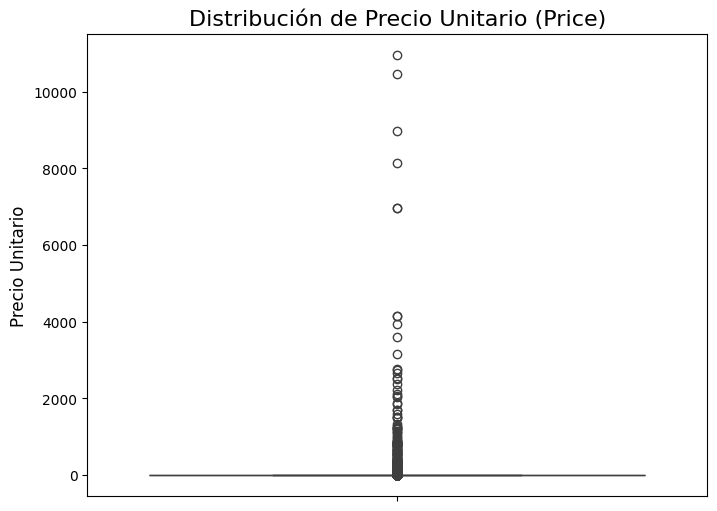

In [97]:
print("\n--- DIAGRAMA DE CAJA Y BIGOTES (BOX PLOT) ---")

# Vamos a visualizar la distribución del Precio (Price)
plt.figure(figsize=(8, 6))

# Se utiliza el DataFrame limpio 'df_final'
# La variable 'y' es la columna que queremos visualizar (Price).
sns.boxplot(y=df_final['Price'])

plt.title('Distribución de Precio Unitario (Price)', fontsize=16)
plt.ylabel('Precio Unitario', fontsize=12)
plt.show()

##### **JUSTIFICACIÓN:**
1. Es la forma más rápida y visual de identificar la distribución y los outliers (valores atípicos) en las columnas numéricas del dataset que que distorsionan la media.


--- DIAGRAMA DE CAJA Y BIGOTES: Cantidad (Quantity) ---


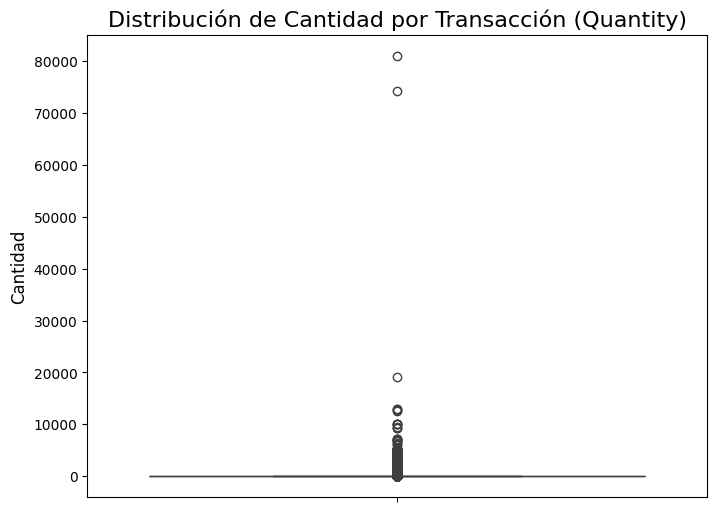

In [98]:
# --- OPCIONAL: Box Plot para Cantidad (Quantity) ---
# Es útil ver ambos, aunque el de Quantity tendrá outliers aún más extremos
print("\n--- DIAGRAMA DE CAJA Y BIGOTES: Cantidad (Quantity) ---")
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_final['Quantity'])
plt.title('Distribución de Cantidad por Transacción (Quantity)', fontsize=16)
plt.ylabel('Cantidad', fontsize=12)
plt.show()

## 3.5 Conclusiones Exploratorias

falta guardar archivo limpio

### 1. Dataset Original

In [ ]:
# 1. Resumen de Características del Dataset Original
print("--- Resumen de Características del Dataset Original ---")
print(f"Número de Registros Originales: {df_original.shape[0]}")
print(f"Número de Columnas Originales: {df_original.shape[1]}")
print(f"Columnas Originales: {list(df_original.columns)}")
print(f"Valores NaN en 'Customer ID' Original: {nan_counts['Customer ID']} (Requiere eliminación)")
print(f"Valores NaN en 'Description' Original: {nan_counts['Description']} (Requiere manejo)")
print(f"Rango de Fechas: Desde {df_original['InvoiceDate'].min()} hasta {df_original['InvoiceDate'].max()} (Estimación)")

--- Resumen de Características del Dataset Original ---
Número de Registros Originales: 1067371
Número de Columnas Originales: 8
Columnas Originales: ['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'Price', 'Customer ID', 'Country']
Valores NaN en 'Customer ID' Original: 243007 (Requiere eliminación)
Valores NaN en 'Description' Original: 4382 (Requiere manejo)
Rango de Fechas: Desde 2009-12-01 07:45:00 hasta 2011-12-09 12:50:00 (Estimación)


### 2. Cambios Aplicados Durante la Limpieza

In [ ]:
# 2. Cambios Aplicados Durante la Limpieza
print("\n--- Cambios Aplicados Durante la Limpieza ---")
for key, value in cambios_limpieza.items():
    print(f"- {value}")
print(f"Total de filas eliminadas: {total_filas_original - df_final.shape[0]}")
print(f"Filas Finales (Limpias): {df_final.shape[0]}")


--- Cambios Aplicados Durante la Limpieza ---
- Se eliminaron 18460 filas con Quantity <= 0 o Price <= 0.
Total de filas eliminadas: 44939
Filas Finales (Limpias): 779425


### 3. Principales Hallazgos del Dataset Final

In [ ]:
# 3. Principales Hallazgos del Dataset Final
print("\n--- Principales Hallazgos del Dataset Final ---")
print(f"1. País con más ventas: {country_sales.index[0]} (Representando un alto porcentaje de las ventas totales).")
print(f"2. Número de Clientes Únicos: {df_final['Customer ID'].nunique()} clientes.")
print(f"3. Ventas Totales Generadas: {df_final['Sales'].sum():,.2f} (Unidad Monetaria).")
print("4. Confirmación: Los datos finales no contienen transacciones con cantidad o precio negativo/cero, ni valores nulos en Customer ID.")
print(f"5. Países Únicos: {df['Country'].nunique()}")
print(f"6. Clientes Únicos (identificados): {df['Customer ID'].nunique()}")


--- Principales Hallazgos del Dataset Final ---
1. País con más ventas: UNITED KINGDOM (Representando un alto porcentaje de las ventas totales).
2. Número de Clientes Únicos: 5878 clientes.
3. Ventas Totales Generadas: 17,374,804.27 (Unidad Monetaria).
4. Confirmación: Los datos finales no contienen transacciones con cantidad o precio negativo/cero, ni valores nulos en Customer ID.
5. Países Únicos: 41
6. Clientes Únicos (identificados): 5942


### 4. Conclusiones exploratorias

In [95]:
# 4. Conclusiones exploratorias

print("\n--- 3.5 Conclusiones Exploratorias ---")

print("\n## Principales Hallazgos")
print("* **Distribución de Ventas:** El histograma muestra que la gran mayoría de las transacciones tienen un valor de venta bajo, con una larga cola hacia la derecha (valores atípicos/outliers de alto valor).")
print("* **Dominio Geográfico:** El gráfico de barras confirma que el país **REINO UNIDO** domina abrumadoramente el volumen de transacciones, siendo el principal mercado a analizar.")
print("* **Tendencia Temporal:** La línea de tiempo muestra una clara estacionalidad o tendencia positiva, con un pico de ventas evidente en el penúltimo mes, seguido de una caída en el mes final (periodo de datos incompleto o cierre de año).")

print("\n## Cambios Aplicados Durante la Limpieza")
print("* **Eliminación de Nulos:** Se eliminaron registros con nulos en **Customer ID** (~25% de datos originales) y **Description** (mínimo), justificando el enfoque del EDA en clientes identificados.")
print("* **Corrección de Tipos:** Se convirtió **InvoiceDate** a `datetime` y **Customer ID** a `object`.")
print("* **Tratamiento de Incoherencias:** Se eliminaron las transacciones con **Quantity <= 0** (devoluciones) y **Price <= 0** (artículos gratuitos o errores), quedando el dataset enfocado en ventas reales.")
print("* **Creación de Métrica:** Se creó la columna **Sales** para un análisis de valor más directo.")


--- 3.5 Conclusiones Exploratorias ---

## Principales Hallazgos
* **Distribución de Ventas:** El histograma muestra que la gran mayoría de las transacciones tienen un valor de venta bajo, con una larga cola hacia la derecha (valores atípicos/outliers de alto valor).
* **Dominio Geográfico:** El gráfico de barras confirma que el país **REINO UNIDO** domina abrumadoramente el volumen de transacciones, siendo el principal mercado a analizar.
* **Tendencia Temporal:** La línea de tiempo muestra una clara estacionalidad o tendencia positiva, con un pico de ventas evidente en el penúltimo mes, seguido de una caída en el mes final (periodo de datos incompleto o cierre de año).

## Cambios Aplicados Durante la Limpieza
* **Eliminación de Nulos:** Se eliminaron registros con nulos en **Customer ID** (~25% de datos originales) y **Description** (mínimo), justificando el enfoque del EDA en clientes identificados.
* **Corrección de Tipos:** Se convirtió **InvoiceDate** a `datetime` y **Customer 